In [1]:
# !pip install tensorflow

In [2]:
# data => Salary_Data.csv
# location=> https://mitu.co.in/dataset

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# !pip install pandas

In [11]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [13]:
df.shape

(30, 2)

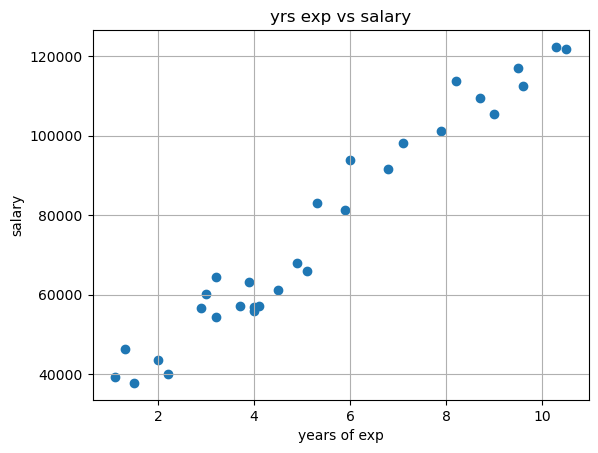

In [15]:
plt.title('yrs exp vs salary')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'], df['Salary'])
plt.grid()

In [17]:
# separate input and output

In [19]:
x = df[['YearsExperience']]
y = df['Salary']

In [21]:
# !pip install scikit-learn

In [23]:
# cross validation

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size= 0.25,
                                                   random_state= 0)

In [25]:
x_train.shape

(22, 1)

In [27]:
x_test.shape

(8, 1)

In [29]:
# linear regression

In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
# create an object

regressor = LinearRegression()

In [35]:
regressor.fit(x_train, y_train)

LinearRegression()

In [37]:
# predict on test set

y_pred = regressor.predict(x_test)

In [39]:
y_pred

array([ 41056.25705466, 123597.70938378,  65443.50433372,  63567.56223533,
       116093.94099022, 108590.17259667, 117031.91203942,  64505.53328452])

In [41]:
pd.DataFrame({
    'actual': y_test,
    'predicted': y_pred
})

,actual,predicted
2,37731.0,41056.257055
28,122391.0,123597.709384
13,57081.0,65443.504334
10,63218.0,63567.562235
26,116969.0,116093.940990
24,109431.0,108590.172597
27,112635.0,117031.912039
11,55794.0,64505.533285


In [47]:
# mean absolute error
sum(abs(y_test - y_pred)) / len(y_test)

3508.5455930660555

In [49]:
# function
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

3508.5455930660555

In [51]:
# actual accuracy/ r2 score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9779208335417602

In [53]:
regressor.coef_

array([9379.71049195])

In [55]:
regressor.intercept_

26986.691316737248

In [57]:
# predict on new value
regressor.predict([[14]])

/home/aditya/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([158302.63820398])

In [59]:
14 * 9379.71049195 + 26986.691316737248

158302.63820403724

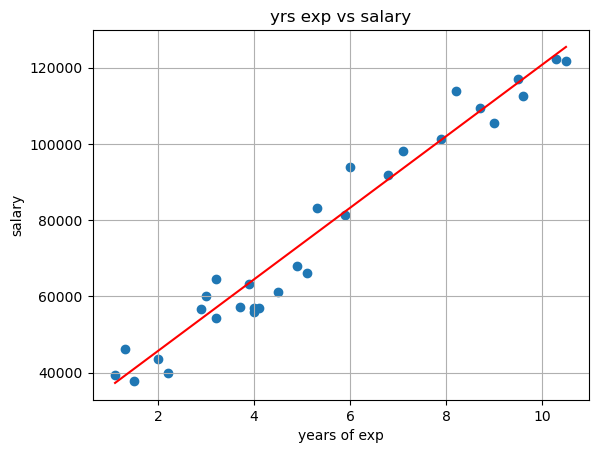

In [63]:
plt.title('yrs exp vs salary')
plt.xlabel('years of exp')
plt.ylabel('salary')
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(x, regressor.predict(x), color = 'red')
plt.grid()